### Dataframe exploration

In [1]:
import resources as helpers
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
for column in list(df_num_only.columns):
    #replace = df_num_cat[column].value_counts()[df_num_cat[column].value_counts()< 300].index
    #df_num_cat[column].replace(replace, value= 'other',inplace= True)
    print(df_num_only[column].value_counts())

NameError: name 'df_num_only' is not defined

In [ ]:
x_list = [column for column in df_obj_cat.columns if column not in 'price']

X_cat = pd.get_dummies(df_obj_cat[x_list], drop_first= True)
y = df_cleaned['price']
model = sm.OLS(y, sm.add_constant(X_cat))
results = model.fit()
for column in df_obj_cat.columns:
    print(df_obj_cat[column].value_counts())

In [ ]:
x_list = [index for index in continuous if index != 'price']
y = df_cleaned['price']
X_num = df_num_only[x_list]

model_num = sm.OLS(y, sm.add_constant(X_num))
result_num = model_num.fit()


In [ ]:
print(result_num.summary())

In [ ]:
num_cat_x_list = pd.concat([X_num, X_cat], axis= 1)
model_combined = sm.OLS(y, sm.add_constant(num_cat_x_list))
result_combined = model_combined.fit()
result_combined

In [ ]:
print(result_combined.summary())

In [ ]:
fig = plt.figure(figsize=(15,30))
#sm.graphics.abline_plot(model_results= result_combined, ax = ax );
final_plot = sm.graphics.plot_partregress_grid(
    result_combined,
    exog_idx=list(num_cat_x_list.columns.values),
    grid=(9,3),
    fig=fig);

### Graphing Object Categories Dataframe
**Result** Both having a waterfront and greenbelt showed to be benificial to the price but nuisance was about the same.

In [ ]:
df_obj_cat['price'].loc[df_obj_cat['waterfront'] == 'YES'].std()

### Adding One At A Time


In [ ]:
df_cleaned['sqft_living']

In [ ]:
df_cleaned.columns

In [ ]:
x = df_cleaned[['bedrooms', 'bathrooms', 'floors']]
y = df_cleaned['price']
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
print(results.summary())

In [ ]:
x = df_cleaned[['floors']]
y = df_cleaned['price']
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
print(results.summary())


In [ ]:
df_cleaned.loc[df_cleaned['sqft_living'] == df_cleaned['sqft_above']]['price'].mean()

In [ ]:
df_cleaned.loc[df_cleaned['sqft_living'] != df_cleaned['sqft_above']]['price'].mean()

In [ ]:
len(df_cleaned.loc[df_cleaned['sqft_living'] != df_cleaned['sqft_above']]), len(df_cleaned.loc[df_cleaned['sqft_living'] == df_cleaned['sqft_above']]['price'])

In [ ]:
df_cleaned.plot.scatter('sqft_above', 'price')

In [ ]:
df_cleaned.plot.scatter('sqft_basement', 'price')

In [ ]:
results.params

## Data Understanding

In [4]:
df = pd.read_csv('dsc-phase-2-project-v2-5-main/data/kc_house_data.csv')    #Read the file
helpers.de.look_dataframe(df)    #Look at dataframe
helpers.dp.correlation_with(df, 'price')
helpers.de.look_columns(df, ['heat_source', 'sewer_system'])    # Look at the columns with missing values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


Column Names: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long']
Number of observation: 30155
Duplicates detected


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


N/A detected
Columns with NaN:  ['heat_source', 'sewer_system']
heat_source has 8/30155 unique observations. 
Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64
Number of missing values: 32
sewer_system has 5/30155 unique observations. 
PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64
Number of missing values: 14


,heat_source,sewer_system
0,Gas,PUBLIC
1,Oil,PUBLIC
2,Gas,PUBLIC
3,Gas,PUBLIC
4,Electricity,PUBLIC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   heat_source   30123 non-null  object
 1   sewer_system  30141 non-null  object
dtypes: object(2)
memory usage: 471.3+ KB


None

In [5]:
## Setup for columns and subsets
useful_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront'
              , 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system'
              , 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']

useless_col = ['date', 'id', 'lat', 'long', 'address']
categorical = [ 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt', 'nuisance'
               , 'view', 'condition', 'grade', 'heat_source', 'sewer_system']
continuous = [column for column in useful_col if column not in categorical]

**Column Names:** <br>
'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long'

**Useful:** <br>
'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'

**Useless:** <br>
'date', 'id', 'lat', 'long', 'address'

**Potentially Useful:** <br>
'yr_built', 'yr_renovated'

**Actions Needed**
1. Delete duplicates
2. Remove missing values
3. Remove unnecessary rows and columns
4. Remove Outliers
5. Group Small samples categories

## Data Preparations

In [ ]:
## 5.


In [6]:
for df in [df_num_cat, df_obj_cat, df_num_only]:
    display(df)

NameError: name 'df_num_cat' is not defined

NameError: name 'df_cleaned' is not defined

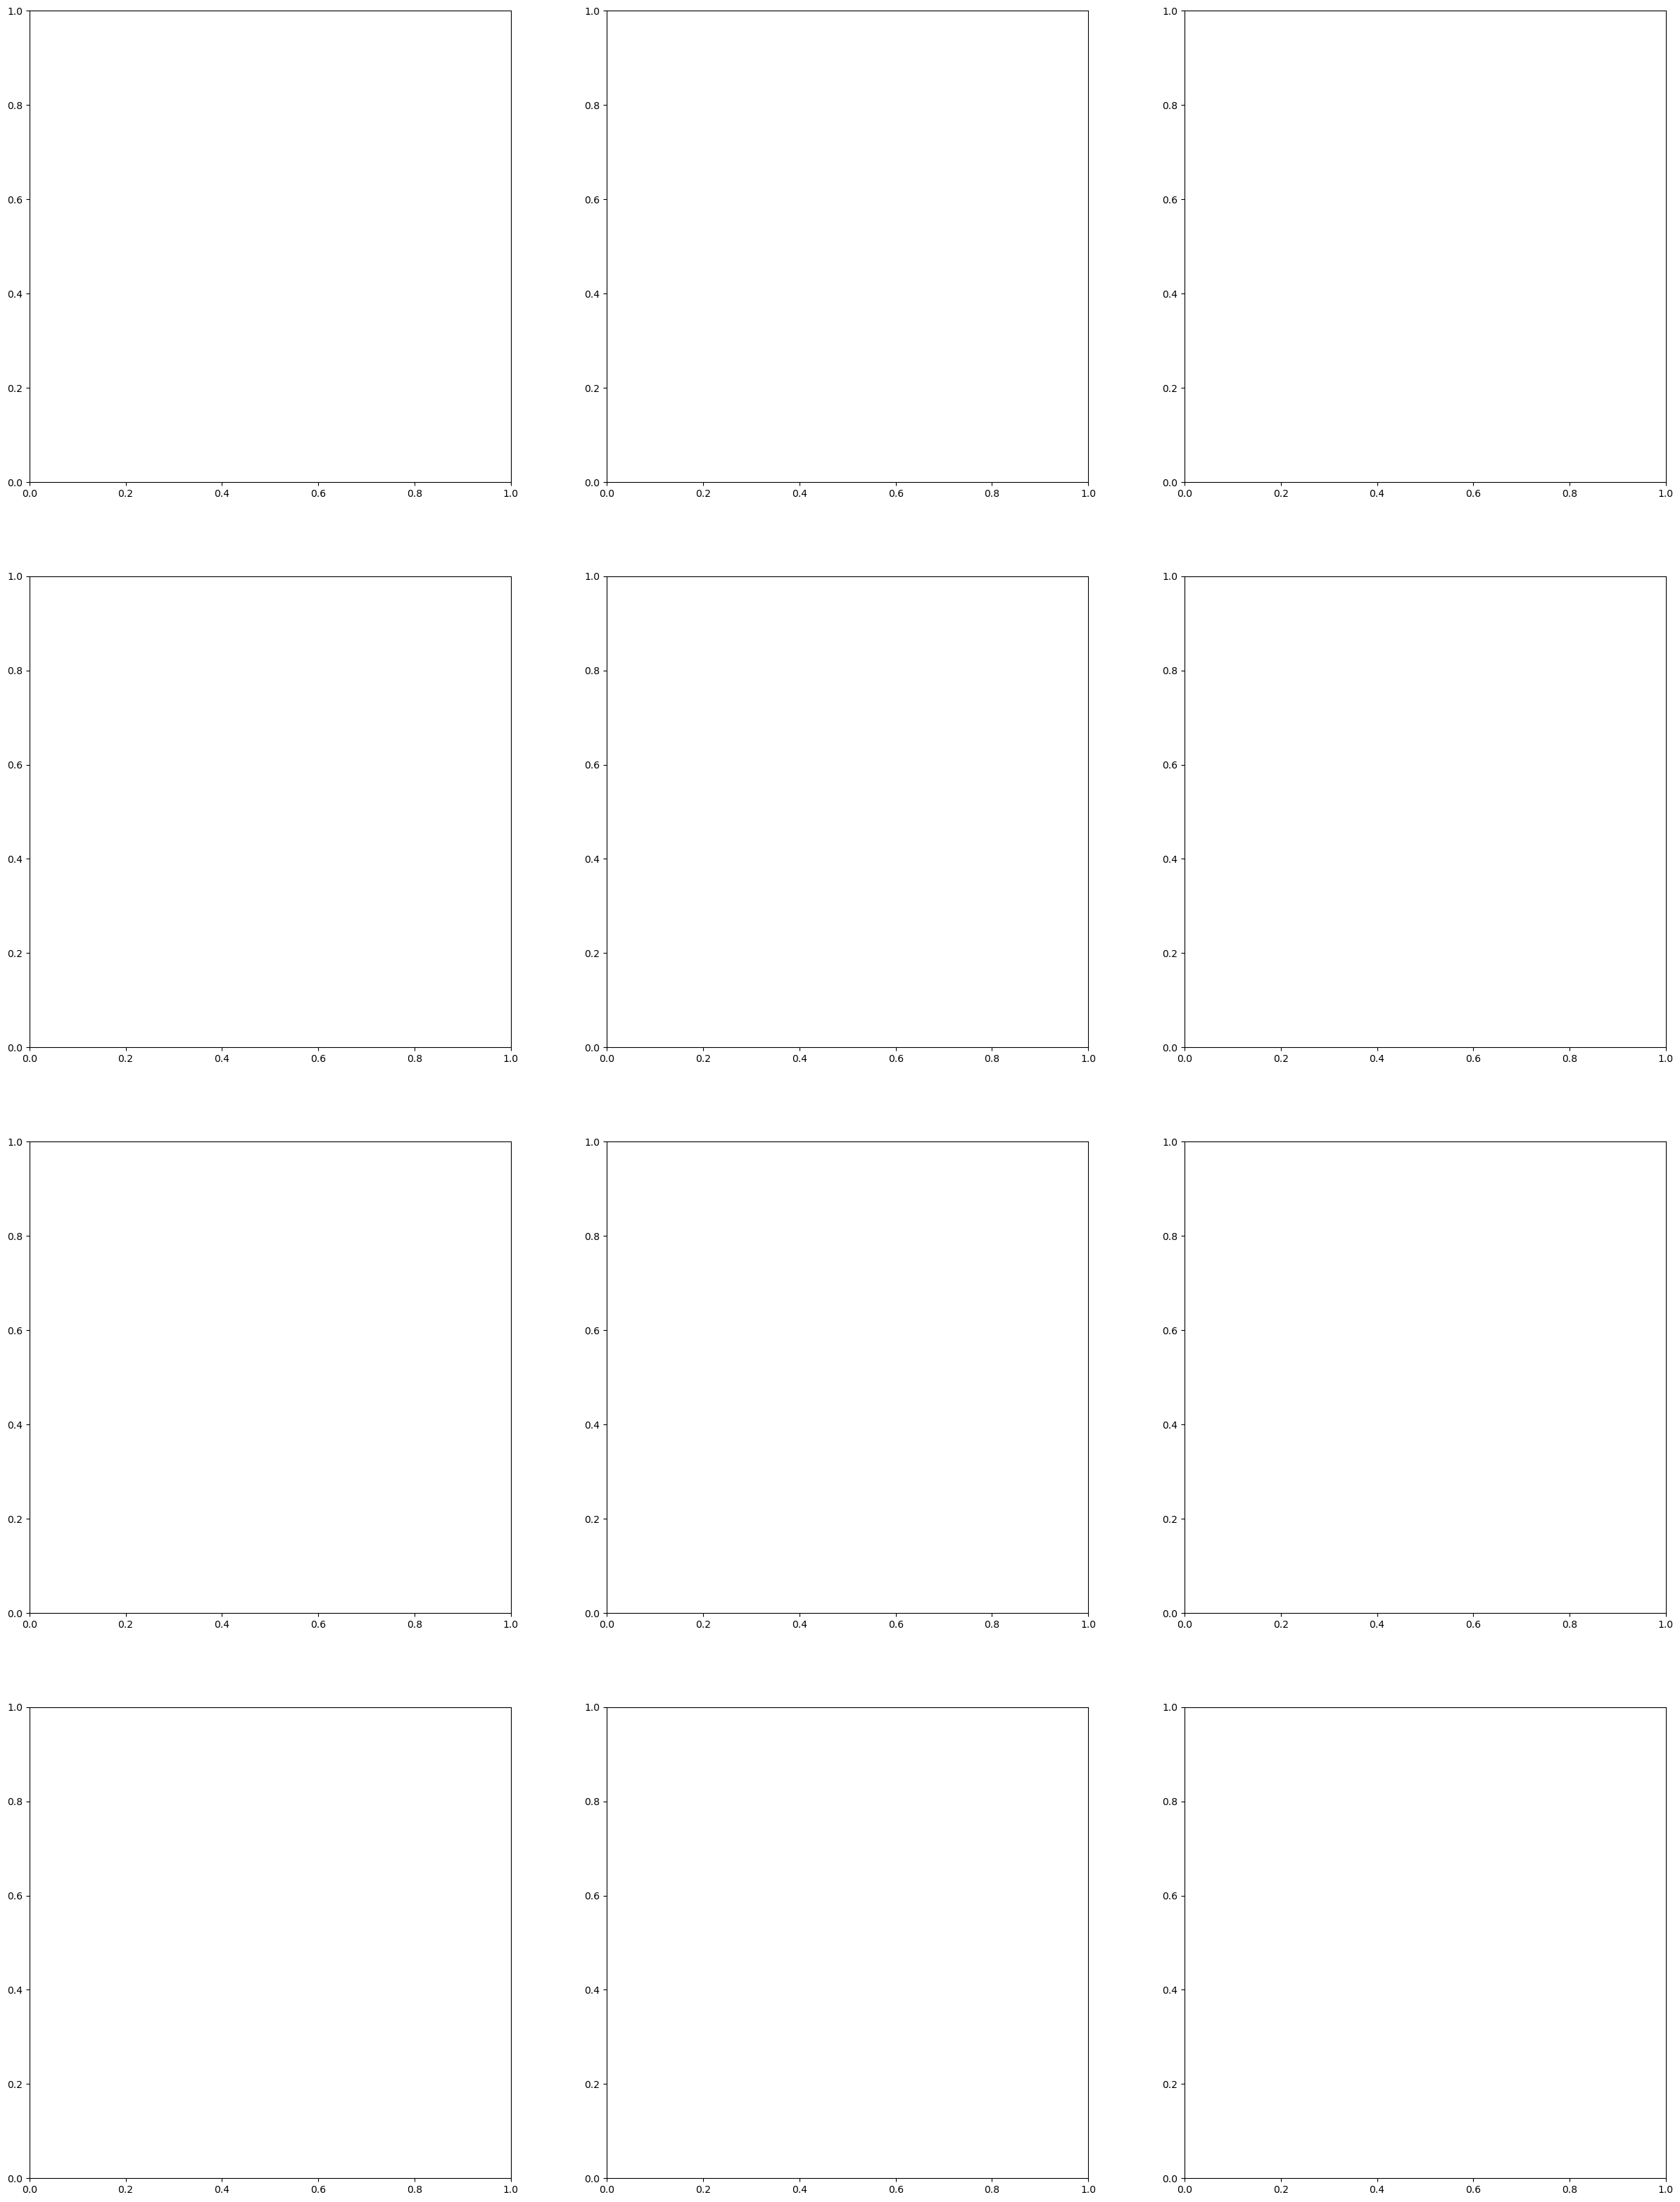

In [7]:
fig, ax = plt.subplots(ncols= 3, nrows = 4, figsize = (30,40))
row = 0 
col = 0
delete = []
for category in categorical:

    group = df_cleaned[[category, 'price']].groupby(category).mean()
    x_group = [value[0] for value in group.values.tolist()]
    ax[row][col].bar((group.index), x_group)
    ax[row][col].set_title(category)
    df_cleaned[category].value_counts()
    if col == 2:
        row += 1
        col = 0
    else:
        col += 1
fig.delaxes(ax[3][2])
plt.tight_layout()

NameError: name 'df_cleaned' is not defined

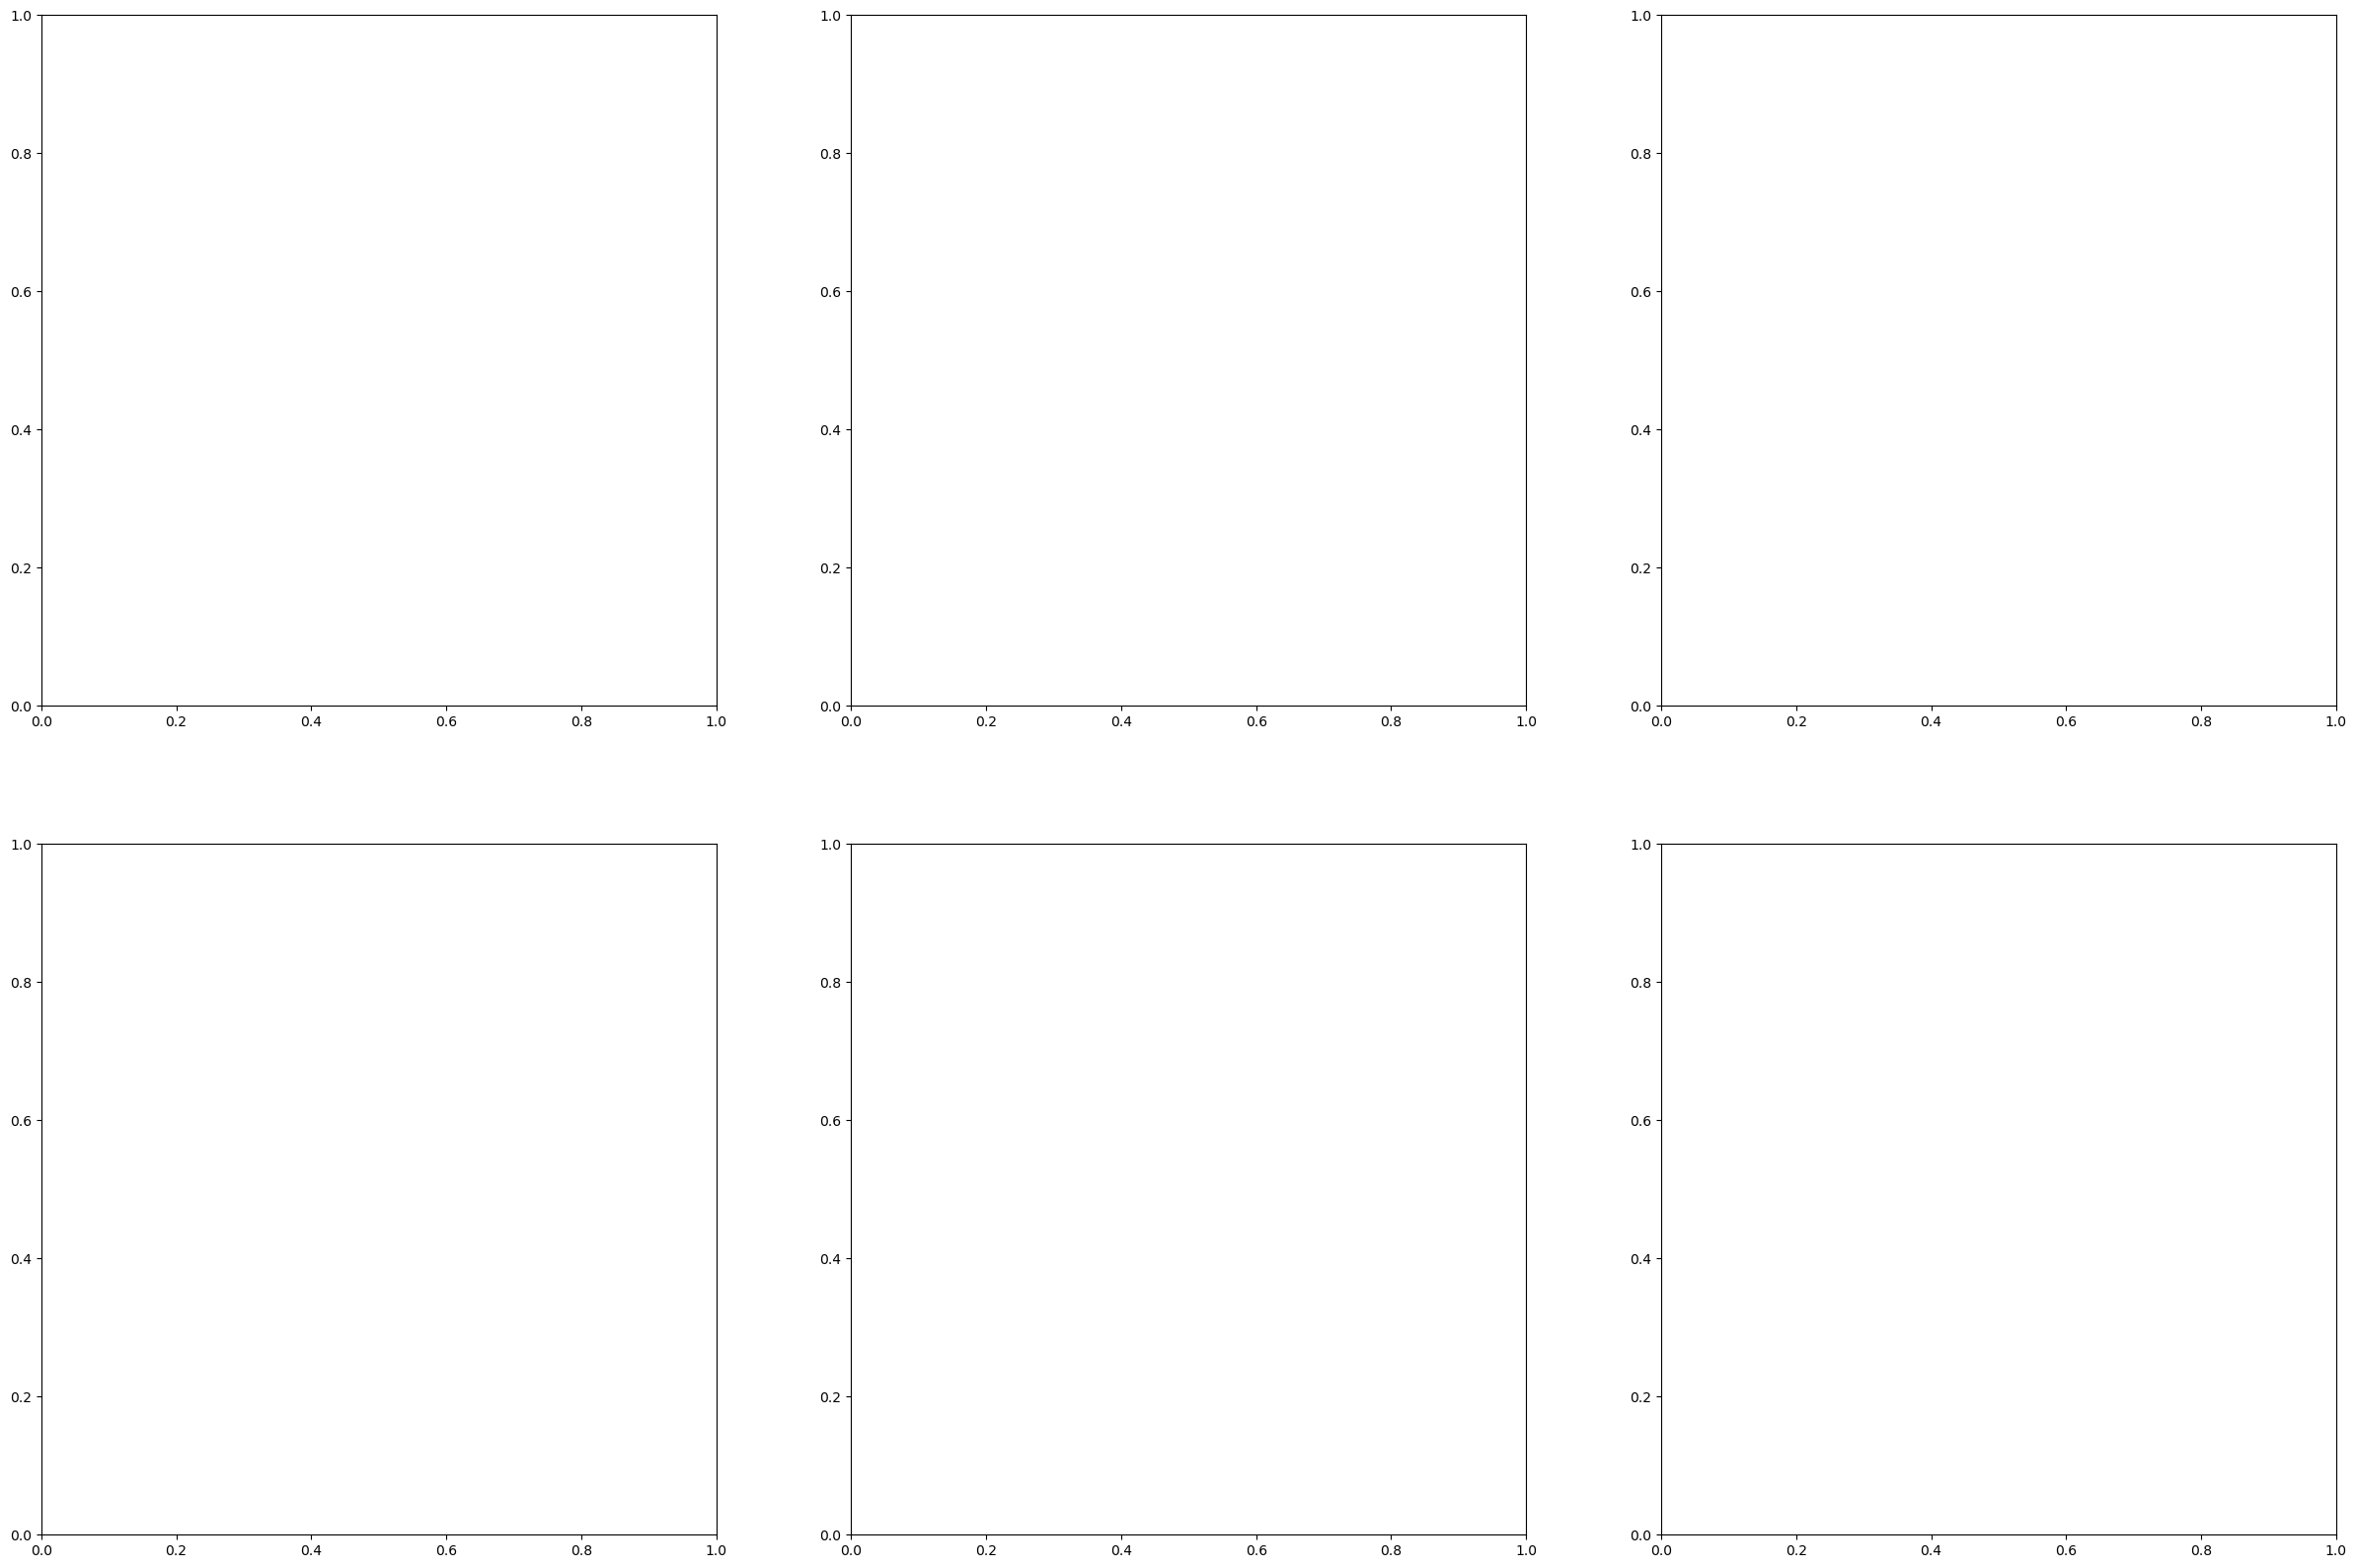

In [8]:
fig, ax = plt.subplots(ncols= 3, nrows = 2, figsize = (30,20))
row = 0 
col = 0
delete = []
for variable in continuous[1:]:

    df_cleaned.plot.scatter(x = variable, y = 'price', ax = ax[row][col])
    ax[row][col].set_title(variable)
    if col == 2:
        row += 1
        col = 0
    else:
        col += 1

plt.tight_layout()

NameError: name 'df_cleaned' is not defined

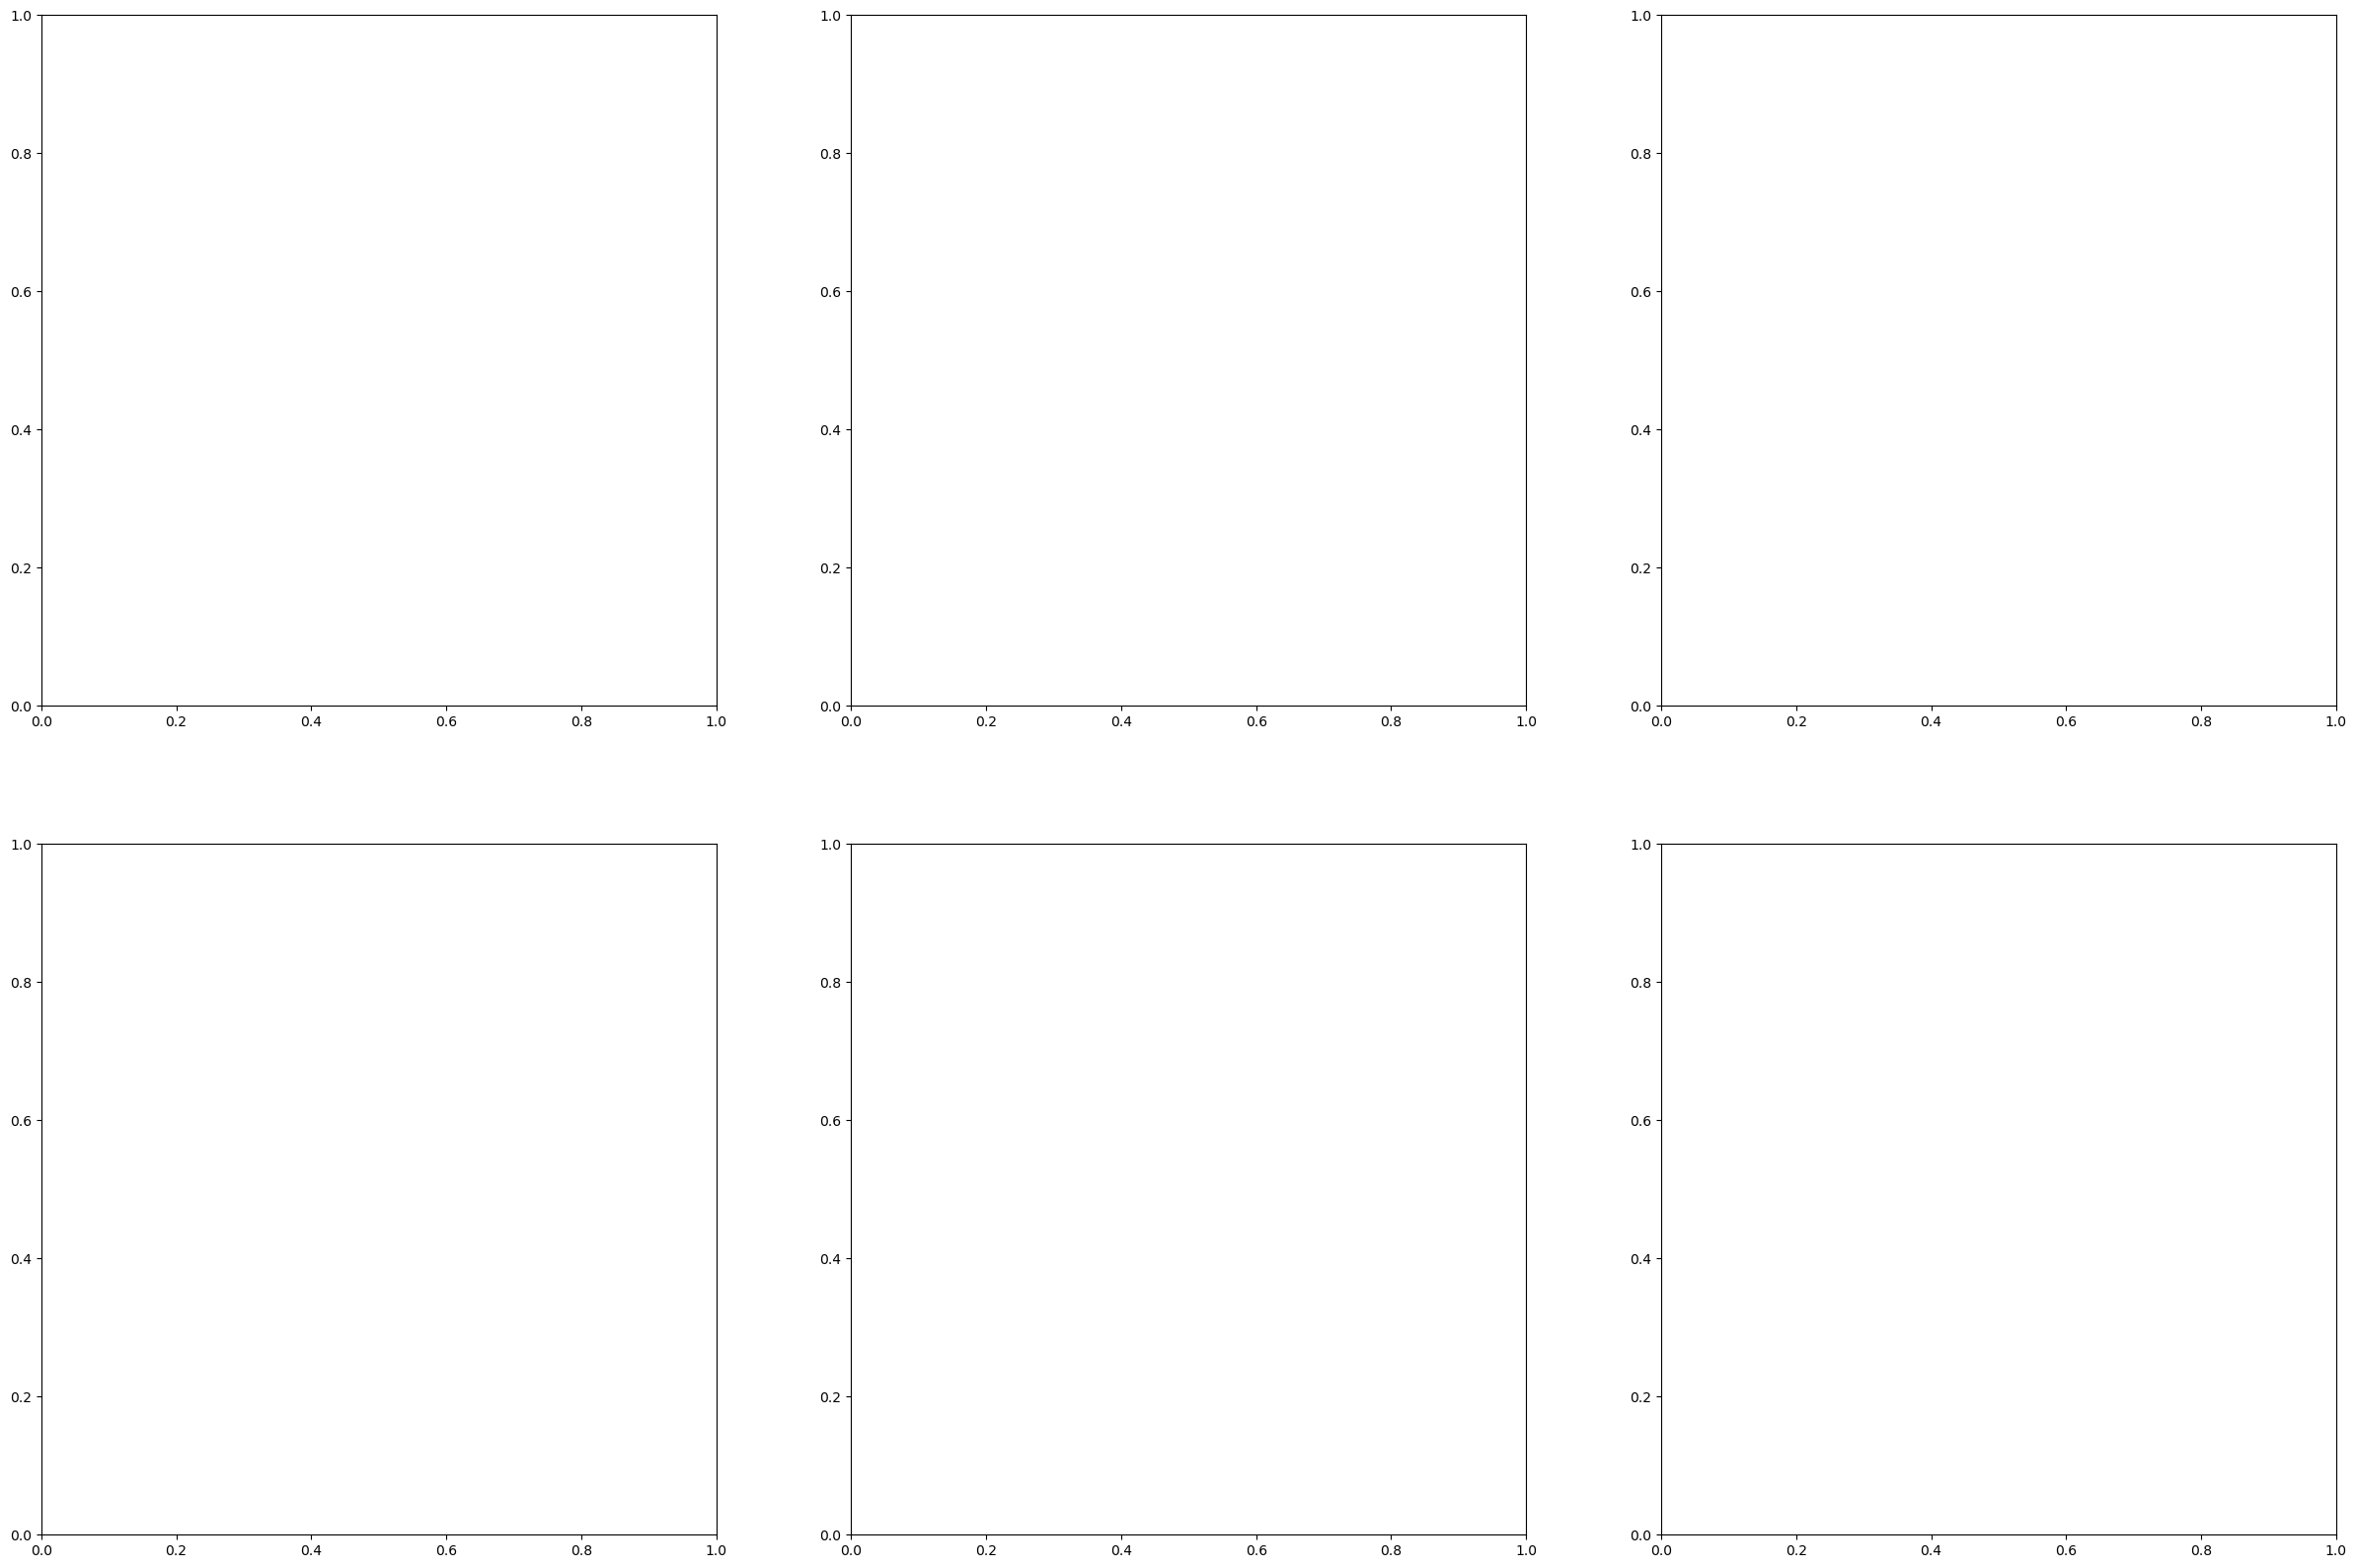

In [9]:
fig, ax = plt.subplots(ncols= 3, nrows = 2, figsize = (30,20))
row = 0 
col = 0
delete = []
df_cleaned_log = helpers.de.apply_log(df_cleaned, ['price'])
for variable in continuous[1:]:

    df_cleaned_log.plot.scatter(x = variable, y = 'price', ax = ax[row][col])
    ax[row][col].set_title(variable)
    if col == 2:
        row += 1
        col = 0
    else:
        col += 1

#plt.tight_layout()

In [ ]:
df_cleaned_log.columns

Linear Variables 
Checked through Log transformation : 'sqft_living', 'sqft_basement'

In [ ]:
Columns to use after explorations: 

## Data Preperation 

### Categories

In [ ]:
x_list = [column for column in df_obj_cat.columns if column not in 'price']

X_cat = pd.get_dummies(df_obj_cat[x_list], drop_first= True)
y = df_cleaned['price']
model = sm.OLS(y, sm.add_constant(X_cat))
results = model.fit()
for column in df_obj_cat.columns:
    print(df_obj_cat[column].value_counts())

In [ ]:
coeff_pairs = zip(results.pvalues.keys(), results.pvalues.values)
index = 0
for variable in list(coeff_pairs):
    if float(variable[1]) > .05: print(variable)